# Import Libraries

In [1]:
#pip install chart-studio

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#Import the required libraries
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.svm import OneClassSVM
import plotly
%matplotlib inline

In [3]:
# Load the SNMP MIB data
data = pd.read_csv("C:/Python/Capstone Project/ANOVA/testfinal.csv")
data = pd.get_dummies(data, columns=['host','Battery_Status','Output_Status'])

In [4]:
data.describe()

,Base_Config_Num_Device,Battery_Voltage,Capacity,Config_Rated_Output_Voltage,Date_Manufacture,Full_Charge_Voltage,Input_Frequency,Input_Line_Voltage,Input_Max_Line_Voltage,Input_Min_Line_Voltage,...,Remaining_Time,Replacement,Temperature,Time_On_Battery,host_10.0.0.53,host_10.0.0.8,Battery_Status_2.0,Output_Status_2,Output_Status_3,Output_Status_6
count,1088732.0,1.088732e+06,1.088732e+06,1088732.0,0.0,1.088732e+06,12761.000000,1.088732e+06,1.088732e+06,16479.000000,...,1.088732e+06,1088732.0,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06
mean,4.0,2.200726e+01,9.667899e+01,2300.0,NaN,8.597316e+02,460.931275,2.412694e+03,2.509750e+03,2267.597730,...,1.490202e+01,0.0,2.816456e+02,2.098949e+00,5.361375e-01,4.638625e-01,1.205806e-02,9.972555e-01,1.003920e-03,1.740557e-03
std,0.0,1.484557e-01,3.319450e+00,0.0,NaN,5.384967e+02,132.399408,8.562087e+01,6.154385e+01,570.589194,...,6.928519e+02,0.0,4.029250e+01,8.346569e+01,4.986926e-01,4.986926e-01,1.091452e-01,5.231584e-02,3.166881e-02,4.168368e-02
min,4.0,2.000000e+01,5.500000e+01,2300.0,NaN,3.600000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.0,2.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.0,2.200000e+01,9.300000e+01,2300.0,NaN,3.600000e+02,499.000000,2.397000e+03,2.452000e+03,2393.000000,...,0.000000e+00,0.0,2.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.0,2.200000e+01,9.500000e+01,2300.0,NaN,3.600000e+02,499.000000,2.415000e+03,2.457000e+03,2408.000000,...,0.000000e+00,0.0,2.500000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,4.0,2.200000e+01,1.000000e+02,2300.0,NaN,1.440000e+03,499.000000,2.433000e+03,2.576000e+03,2426.000000,...,0.000000e+00,0.0,3.200000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.0,2.400000e+01,1.000000e+02,2300.0,NaN,1.440000e+03,500.000000,2.573000e+03,2.576000e+03,2464.000000,...,1.200000e+05,0.0,4.000000e+02,5.135000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Data Cleaning

In [5]:
#drop columns
data_new=data.drop(['name','Last_Replacement_Date','Date_Manufacture','time','host_10.0.0.53','host_10.0.0.8','Battery_Status_2.0','Output_Status_2','Output_Status_3','Output_Status_6'], axis=1)

### Data tweak

In [6]:
# Data imputation to create outliers, temperature spike 
# and low battery capacity
data_new.loc[data_new['Temperature'] == 22, 'Temperature'] = 60
data_new.loc[data_new['Capacity'] == 55, 'Capacity'] = 10

In [7]:
data_new.describe()

,Base_Config_Num_Device,Battery_Voltage,Capacity,Config_Rated_Output_Voltage,Full_Charge_Voltage,Input_Frequency,Input_Line_Voltage,Input_Max_Line_Voltage,Input_Min_Line_Voltage,Output_Frequency,Output_Line_Voltage,Output_Load,Remaining_Time,Replacement,Temperature,Time_On_Battery
count,1088732.0,1.088732e+06,1.088732e+06,1088732.0,1.088732e+06,12761.000000,1.088732e+06,1.088732e+06,16479.000000,1.088732e+06,1.088732e+06,12750.000000,1.088732e+06,1088732.0,1.088732e+06,1.088732e+06
mean,4.0,2.200726e+01,9.667535e+01,2300.0,8.597316e+02,460.931275,2.412694e+03,2.509750e+03,2267.597730,4.984651e+02,2.298758e+03,5.923451,1.490202e+01,0.0,2.816456e+02,2.098949e+00
std,0.0,1.484557e-01,3.389042e+00,0.0,5.384967e+02,132.399408,8.562087e+01,6.154385e+01,570.589194,1.629388e+01,7.092235e+00,3.129757,6.928519e+02,0.0,4.029250e+01,8.346569e+01
min,4.0,2.000000e+01,1.000000e+01,2300.0,3.600000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,2.200000e+02,0.000000e+00
25%,4.0,2.200000e+01,9.300000e+01,2300.0,3.600000e+02,499.000000,2.397000e+03,2.452000e+03,2393.000000,4.990000e+02,2.297000e+03,7.000000,0.000000e+00,0.0,2.500000e+02,0.000000e+00
50%,4.0,2.200000e+01,9.500000e+01,2300.0,3.600000e+02,499.000000,2.415000e+03,2.457000e+03,2408.000000,4.990000e+02,2.300000e+03,7.000000,0.000000e+00,0.0,2.500000e+02,0.000000e+00
75%,4.0,2.200000e+01,1.000000e+02,2300.0,1.440000e+03,499.000000,2.433000e+03,2.576000e+03,2426.000000,4.990000e+02,2.300000e+03,8.000000,0.000000e+00,0.0,3.200000e+02,0.000000e+00
max,4.0,2.400000e+01,1.000000e+02,2300.0,1.440000e+03,500.000000,2.573000e+03,2.576000e+03,2464.000000,5.000000e+02,2.473000e+03,8.000000,1.200000e+05,0.0,4.000000e+02,5.135000e+03


In [9]:
#to check missing values
#.dropna()
data_new.isna().sum().where(lambda x: x>0)

Base_Config_Num_Device               NaN
Battery_Voltage                      NaN
Capacity                             NaN
Config_Rated_Output_Voltage          NaN
Full_Charge_Voltage                  NaN
Input_Frequency                1075971.0
Input_Line_Voltage                   NaN
Input_Max_Line_Voltage               NaN
Input_Min_Line_Voltage         1072253.0
Output_Frequency                     NaN
Output_Line_Voltage                  NaN
Output_Load                    1075982.0
Remaining_Time                       NaN
Replacement                          NaN
Temperature                          NaN
Time_On_Battery                      NaN
dtype: float64

In [10]:
# impute the missing values with mean
data_new['Battery_Voltage'] = data_new['Battery_Voltage'].fillna(data_new['Battery_Voltage'].mean())
data_new['Input_Frequency'] = data_new['Input_Frequency'].fillna(data_new['Input_Frequency'].mean())
data_new['Output_Load'] = data_new['Output_Load'].fillna(data_new['Output_Load'].mean())
data_new['Input_Min_Line_Voltage'] = data_new['Input_Min_Line_Voltage'].fillna(data_new['Input_Min_Line_Voltage'].mean())

In [11]:
# to standardize the data
data_new['Temperature'] = (data_new['Temperature'] * 0.10).round(2)
data_new['Input_Line_Voltage'] = (data_new['Input_Line_Voltage'] * 0.10).round(2)
data_new['Full_Charge_Voltage'] = (data_new['Full_Charge_Voltage'] * 0.10).round(2)
data_new['Config_Rated_Output_Voltage'] = (data_new['Config_Rated_Output_Voltage'] * 0.10).round(2)
data_new['Input_Max_Line_Voltage'] = (data_new['Input_Max_Line_Voltage'] * 0.10).round(2)
data_new['Input_Min_Line_Voltage'] = (data_new['Input_Min_Line_Voltage'] * 0.10).round(2)
data_new['Output_Line_Voltage'] = (data_new['Output_Line_Voltage'] * 0.10).round(2)

# EDA

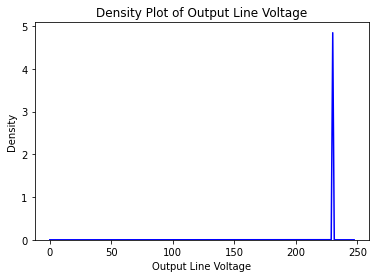

In [12]:
sns.kdeplot(data_new['Output_Line_Voltage'], color='blue')
plt.title("Density Plot of Output Line Voltage")
plt.xlabel("Output Line Voltage")
plt.ylabel("Density")
plt.show()


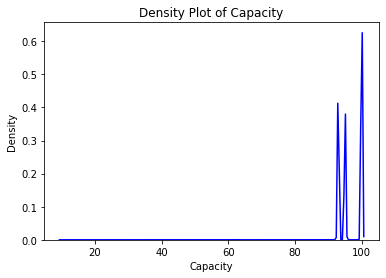

In [60]:
sns.kdeplot(data_new['Capacity'], color='blue')
plt.title("Density Plot of Capacity")
plt.xlabel("Capacity")
plt.ylabel("Density")
plt.show()

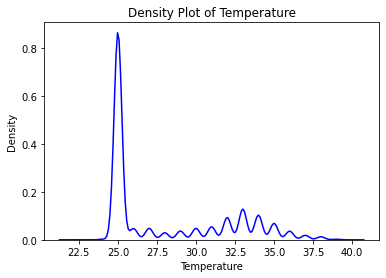

In [13]:
sns.kdeplot(data_new['Temperature'], color='blue')
plt.title("Density Plot of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.show()

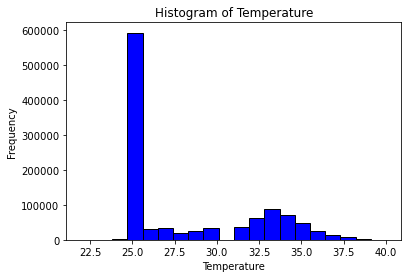

In [14]:
plt.hist(data_new['Temperature'], bins=20, color='blue', edgecolor='black')
plt.title("Histogram of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


C:\Users\Dila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


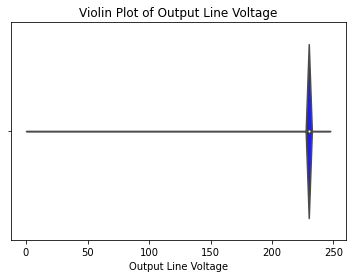

In [15]:
sns.violinplot(data_new['Output_Line_Voltage'], color='blue')
plt.title("Violin Plot of Output Line Voltage")
plt.xlabel("Output Line Voltage")
plt.show()


# 1)  Isolation Forest

Isolation Forest(IF) is similar to Random Forest and it is build based on decision trees. There are no pre-defined labels here. 
It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data.

The Isolation Forest (iForest) algorithm was initially proposed by Fei Tony Liu, Kai Ming Ting and Zhi-Hua Zhou in 2008. The authors took advantage of two quantitative properties of anomalous data points in a sample:

Few - they are the minority consisting of fewer instances and
Different - they have attribute-values that are very different from those of normal instances
Since the Isolation Forest algorithm is based on the principle that anomalies are observations that are few and different, this should make them easier to identify.

Isolation Forest does not assume normal distribution and is able to detect outliers at a multi-dimensional level. Isolation Forest is computationally efficient: the algorithm has a linear time complexity with a low constant and a low memory requirement. Therefore, it scales well to large data sets.

In [16]:
data_new.describe()

,Base_Config_Num_Device,Battery_Voltage,Capacity,Config_Rated_Output_Voltage,Full_Charge_Voltage,Input_Frequency,Input_Line_Voltage,Input_Max_Line_Voltage,Input_Min_Line_Voltage,Output_Frequency,Output_Line_Voltage,Output_Load,Remaining_Time,Replacement,Temperature,Time_On_Battery
count,1088732.0,1.088732e+06,1.088732e+06,1088732.0,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1.088732e+06,1088732.0,1.088732e+06,1.088732e+06
mean,4.0,2.200726e+01,9.667535e+01,230.0,8.597316e+01,4.609313e+02,2.412694e+02,2.509750e+02,2.267600e+02,4.984651e+02,2.298758e+02,5.923451e+00,1.490202e+01,0.0,2.816456e+01,2.098949e+00
std,0.0,1.484557e-01,3.389042e+00,0.0,5.384967e+01,1.433346e+01,8.562087e+00,6.154385e+00,7.019651e+00,1.629388e+01,7.092235e-01,3.386791e-01,6.928519e+02,0.0,4.029250e+00,8.346569e+01
min,4.0,2.000000e+01,1.000000e+01,230.0,3.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.200000e+01,0.000000e+00
25%,4.0,2.200000e+01,9.300000e+01,230.0,3.600000e+01,4.609313e+02,2.397000e+02,2.452000e+02,2.267600e+02,4.990000e+02,2.297000e+02,5.923451e+00,0.000000e+00,0.0,2.500000e+01,0.000000e+00
50%,4.0,2.200000e+01,9.500000e+01,230.0,3.600000e+01,4.609313e+02,2.415000e+02,2.457000e+02,2.267600e+02,4.990000e+02,2.300000e+02,5.923451e+00,0.000000e+00,0.0,2.500000e+01,0.000000e+00
75%,4.0,2.200000e+01,1.000000e+02,230.0,1.440000e+02,4.609313e+02,2.433000e+02,2.576000e+02,2.267600e+02,4.990000e+02,2.300000e+02,5.923451e+00,0.000000e+00,0.0,3.200000e+01,0.000000e+00
max,4.0,2.400000e+01,1.000000e+02,230.0,1.440000e+02,5.000000e+02,2.573000e+02,2.576000e+02,2.464000e+02,5.000000e+02,2.473000e+02,8.000000e+00,1.200000e+05,0.0,4.000000e+01,5.135000e+03


In [17]:
# Select the variable of interest (e.g. battery voltage) from the dataframe
X = data_new[['Battery_Voltage', 'Capacity', 'Config_Rated_Output_Voltage', 'Full_Charge_Voltage', 'Input_Frequency', 'Input_Line_Voltage', 'Input_Max_Line_Voltage', 'Input_Min_Line_Voltage', 'Output_Frequency','Output_Line_Voltage','Output_Load','Remaining_Time','Temperature','Time_On_Battery','Replacement','Base_Config_Num_Device']]

# Train the isolation forest
clf = IsolationForest(random_state=42)
clf.fit(X)

# Predict the outliers in the data
y_pred = clf.predict(X)

# Get the outlier scores
outlier_scores = clf.decision_function(X)

### Adding the scores and anomaly column

These columns are going to be added to the data frame df.

Negative score value "-1" for the value of anomaly columns indicate the presence of anomaly. Value of "1" for the anomaly represents the normal data.

In [18]:
X['scores']=outlier_scores
X['anomaly']=y_pred

<ipython-input-18-c846831f62d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scores']=outlier_scores
<ipython-input-18-c846831f62d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['anomaly']=y_pred


In [19]:
anomaly = X.loc[X['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers are:', len(anomaly))

Total number of outliers are: 114988


In [20]:
# dropping outliers
X_outliersDropped = X.drop(anomaly_index, axis = 0).reset_index(drop=True)

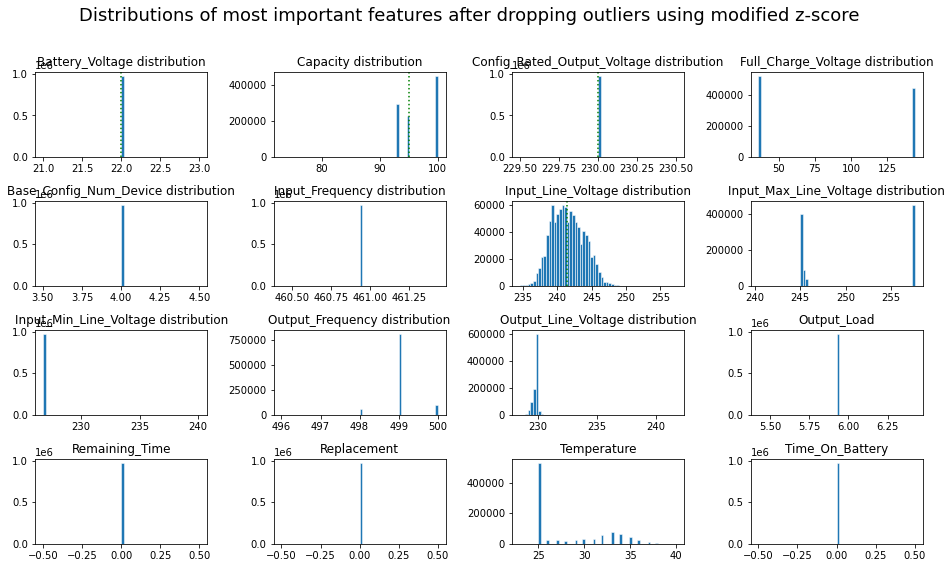

In [21]:
# Checking histogram distributions of most important features after dropping outliers
# row x column , 4x4

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(13,8))
fig.suptitle('Distributions of most important features after dropping outliers using modified z-score\n', size = 18)

axes[0,0].hist(X_outliersDropped['Battery_Voltage'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].axvline(np.median(X_outliersDropped['Battery_Voltage']), ls=':', c='g', label="Median")
axes[0,0].set_title("Battery_Voltage distribution");

axes[0,1].hist(X_outliersDropped['Capacity'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].axvline(np.median(X_outliersDropped['Capacity']), ls=':', c='g', label="Median")
axes[0,1].set_title("Capacity distribution");

axes[0,2].hist(X_outliersDropped['Config_Rated_Output_Voltage'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].axvline(np.median(X_outliersDropped['Config_Rated_Output_Voltage']), ls=':', c='g', label="Median")
axes[0,2].set_title("Config_Rated_Output_Voltage distribution");

axes[0,3].hist(X_outliersDropped['Full_Charge_Voltage'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,3].set_title("Full_Charge_Voltage distribution");

axes[1,0].hist(X_outliersDropped['Base_Config_Num_Device'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Base_Config_Num_Device distribution");

axes[1,1].hist(X_outliersDropped['Input_Frequency'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Input_Frequency distribution");

axes[1,2].hist(X_outliersDropped['Input_Line_Voltage'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].axvline(np.median(X_outliersDropped['Input_Line_Voltage']), ls=':', c='g', label="Median")
axes[1,2].set_title("Input_Line_Voltage distribution");

axes[1,3].hist(X_outliersDropped['Input_Max_Line_Voltage'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,3].set_title("Input_Max_Line_Voltage distribution");

axes[2,0].hist(X_outliersDropped['Input_Min_Line_Voltage'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("Input_Min_Line_Voltage distribution");

axes[2,1].hist(X_outliersDropped['Output_Frequency'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("Output_Frequency distribution");

axes[2,2].hist(X_outliersDropped['Output_Line_Voltage'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("Output_Line_Voltage distribution");

axes[2,3].hist(X_outliersDropped['Output_Load'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,3].set_title("Output_Load");

axes[3,0].hist(X_outliersDropped['Remaining_Time'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("Remaining_Time");

axes[3,1].hist(X_outliersDropped['Replacement'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("Replacement");

axes[3,2].hist(X_outliersDropped['Temperature'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Temperature");

axes[3,3].hist(X_outliersDropped['Time_On_Battery'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,3].set_title("Time_On_Battery");



plt.tight_layout()


# 3) Local Outlier Factor (LOF)

In [55]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
X = data_new[['Temperature','Capacity','']].values
y_pred = clf.fit_predict(X)

In [56]:
data_new.loc[data_new['Temperature'] == 22, 'Temperature'] = 60
data_new.loc[data_new['Capacity'] == 55, 'Capacity'] = 10

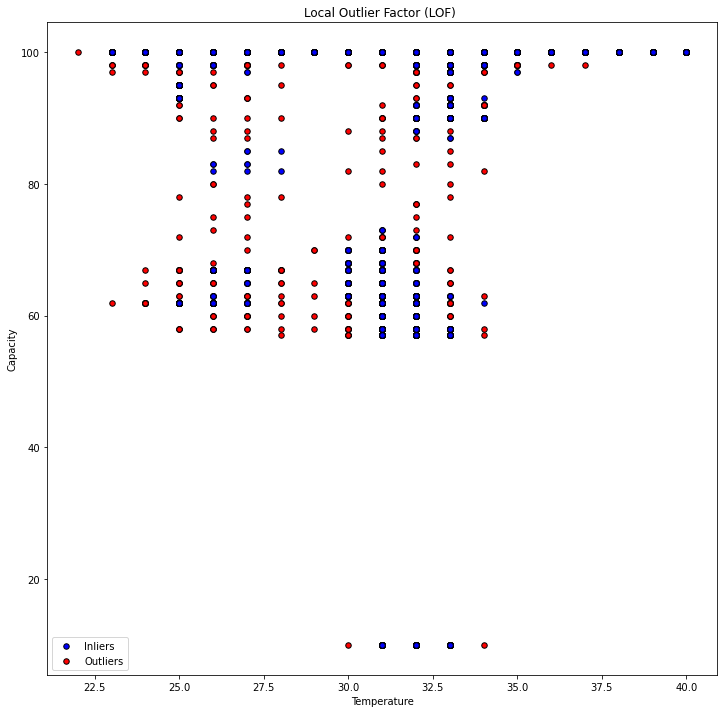

In [57]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF) ")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30, label='Inliers')
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30, label='Outliers')
plt.axis('tight')
plt.xlabel('Temperature');
plt.ylabel('Capacity');
plt.legend(loc='lower left') # adding the legend to the plot
plt.show()

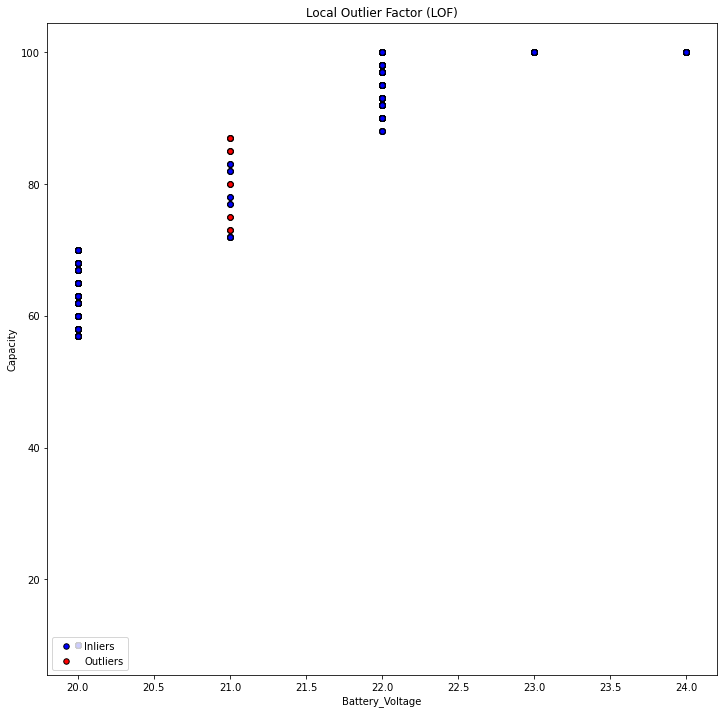

In [58]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
X = data_new[['Battery_Voltage','Capacity']].values
y_pred = clf.fit_predict(X)


plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30, label='Inliers')
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30, label='Outliers')
plt.axis('tight')
plt.xlabel('Battery_Voltage');
plt.ylabel('Capacity');
plt.legend(loc='lower left') # adding the legend to the plot
plt.show()

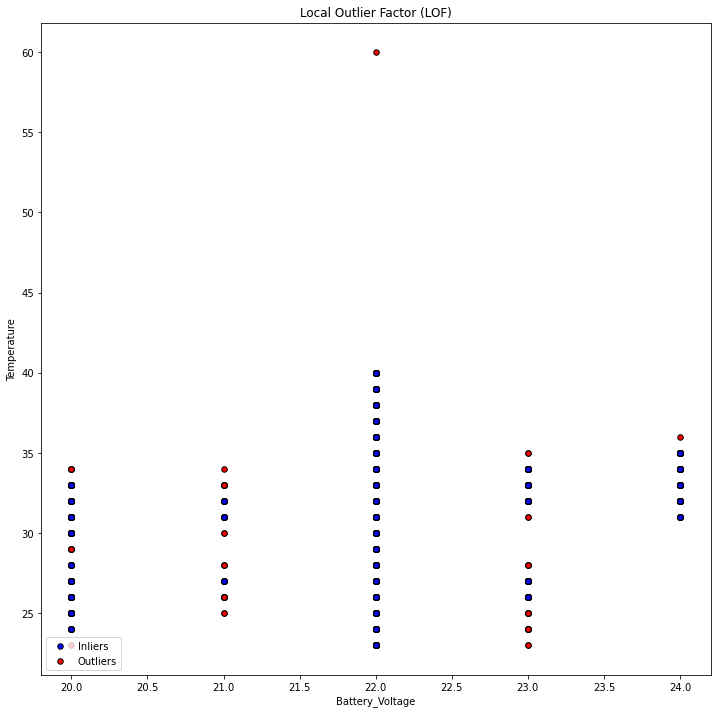

In [61]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
X = data_new[['Battery_Voltage','Temperature']].values
y_pred = clf.fit_predict(X)


plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30, label='Inliers')
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30, label='Outliers')
plt.axis('tight')
plt.xlabel('Battery_Voltage');
plt.ylabel('Temperature');
plt.legend(loc='lower left') # adding the legend to the plot
plt.show()